In [1]:
import matplotlib.pyplot as plt

import pandas as pd 

import numpy as np

In [4]:
data = pd.read_csv("matches.csv", parse_dates=["date"])
data.head() 

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3


In [5]:
data.dtypes

country                   object
league                    object
home_team                 object
away_team                 object
date              datetime64[ns]
season                    object
home_team_goal             int64
away_team_goal             int64
dtype: object

In [8]:
data[data.date.dt.year == 2010]

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
376,Belgium,Belgium Jupiler League,RSC Anderlecht,Club Brugge KV,2010-02-03,2009/2010,3,2
378,Belgium,Belgium Jupiler League,Sporting Charleroi,Standard de Liège,2010-02-04,2009/2010,2,3
381,Belgium,Belgium Jupiler League,KV Mechelen,Beerschot AC,2010-02-02,2009/2010,1,0
404,Belgium,Belgium Jupiler League,Club Brugge KV,KVC Westerlo,2010-01-30,2009/2010,2,1
405,Belgium,Belgium Jupiler League,Standard de Liège,RSC Anderlecht,2010-01-17,2009/2010,0,4
...,...,...,...,...,...,...,...,...
25092,Switzerland,Switzerland Super League,FC Basel,Grasshopper Club Zürich,2010-09-22,2010/2011,2,2
25093,Switzerland,Switzerland Super League,FC St. Gallen,BSC Young Boys,2010-09-22,2010/2011,1,2
25094,Switzerland,Switzerland Super League,AC Bellinzona,FC Thun,2010-09-23,2010/2011,2,2
25095,Switzerland,Switzerland Super League,FC Sion,Neuchâtel Xamax,2010-09-23,2010/2011,1,2


* wszystkie mecze pomiedzy dr A i B w latach 2010-2015

In [9]:
A = "Legia Warszawa"
B = "Lech Poznań"

data[
    ((data.home_team == A) | (data.away_team == A)) &
    ((data.home_team == B) | (data.away_team == B)) &
    (data.date.dt.year.isin([2010, 2011, 2012, 2013, 2014, 2015]))
    
]

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
16088,Poland,Poland Ekstraklasa,Lech Poznań,Legia Warszawa,2010-04-03,2009/2010,1,0
16315,Poland,Poland Ekstraklasa,Lech Poznań,Legia Warszawa,2011-04-16,2010/2011,1,0
16419,Poland,Poland Ekstraklasa,Legia Warszawa,Lech Poznań,2010-09-24,2010/2011,2,1
16468,Poland,Poland Ekstraklasa,Lech Poznań,Legia Warszawa,2011-10-30,2011/2012,0,0
16596,Poland,Poland Ekstraklasa,Legia Warszawa,Lech Poznań,2012-04-21,2011/2012,0,1
16706,Poland,Poland Ekstraklasa,Lech Poznań,Legia Warszawa,2012-11-18,2012/2013,1,3
16836,Poland,Poland Ekstraklasa,Legia Warszawa,Lech Poznań,2013-05-18,2012/2013,1,0
16960,Poland,Poland Ekstraklasa,Lech Poznań,Legia Warszawa,2013-10-27,2013/2014,1,1
17088,Poland,Poland Ekstraklasa,Legia Warszawa,Lech Poznań,2014-03-29,2013/2014,1,0
17172,Poland,Poland Ekstraklasa,Legia Warszawa,Lech Poznań,2014-09-27,2014/2015,2,2


* znajdz 10 z największą różnicą bramek


In [10]:
data['goals_diff'] = abs(data.home_team_goal - data.away_team_goal)
data

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,goals_diff
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1,0
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0,5
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3,2
...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,FC St. Gallen,FC Thun,2015-09-22,2015/2016,1,0,1
25975,Switzerland,Switzerland Super League,FC Vaduz,FC Luzern,2015-09-23,2015/2016,1,2,1
25976,Switzerland,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2015-09-23,2015/2016,2,0,2
25977,Switzerland,Switzerland Super League,Lugano,FC Zürich,2015-09-22,2015/2016,0,0,0


In [11]:
data.sort_values('goals_diff', ascending=False).head(10)

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,goals_diff
13898,Netherlands,Netherlands Eredivisie,PSV,Feyenoord,2010-10-24,2010/2011,10,0,10
7660,France,France Ligue 1,ES Troyes AC,Paris Saint-Germain,2016-03-13,2015/2016,0,9,9
20161,Scotland,Scotland Premier League,Celtic,Aberdeen,2010-11-06,2010/2011,9,0,9
9761,Germany,Germany 1. Bundesliga,FC Bayern Munich,Hamburger SV,2015-02-14,2014/2015,8,0,8
22984,Spain,Spain LIGA BBVA,FC Barcelona,CA Osasuna,2011-09-17,2011/2012,8,0,8
22310,Spain,Spain LIGA BBVA,UD Almería,FC Barcelona,2010-11-20,2010/2011,0,8,8
2420,England,England Premier League,Chelsea,Wigan Athletic,2010-05-09,2009/2010,8,0,8
24015,Spain,Spain LIGA BBVA,Real Madrid CF,Granada CF,2015-04-05,2014/2015,9,1,8
24247,Spain,Spain LIGA BBVA,Real Madrid CF,Rayo Vallecano,2015-12-20,2015/2016,10,2,8
4375,England,England Premier League,Southampton,Sunderland,2014-10-18,2014/2015,8,0,8


In [12]:
data['goals_sum'] = data.home_team_goal + data.away_team_goal
data.sort_values('goals_sum', ascending=False).head(10)

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,goals_diff,goals_sum
20106,Scotland,Scotland Premier League,Motherwell,Hibernian,2010-05-05,2009/2010,6,6,0,12
24247,Spain,Spain LIGA BBVA,Real Madrid CF,Rayo Vallecano,2015-12-20,2015/2016,10,2,8,12
9210,Germany,Germany 1. Bundesliga,FC Bayern Munich,Hamburger SV,2013-03-30,2012/2013,9,2,7,11
3092,England,England Premier League,Manchester United,Arsenal,2011-08-28,2011/2012,8,2,6,10
3368,England,England Premier League,Arsenal,Newcastle United,2012-12-29,2012/2013,7,3,4,10
23443,Spain,Spain LIGA BBVA,Real Madrid CF,Sevilla FC,2013-10-30,2013/2014,7,3,4,10
13898,Netherlands,Netherlands Eredivisie,PSV,Feyenoord,2010-10-24,2010/2011,10,0,10,10
24015,Spain,Spain LIGA BBVA,Real Madrid CF,Granada CF,2015-04-05,2014/2015,9,1,8,10
24113,Spain,Spain LIGA BBVA,Real Madrid CF,Getafe CF,2015-05-23,2014/2015,7,3,4,10
24122,Spain,Spain LIGA BBVA,RC Deportivo de La Coruña,Real Madrid CF,2014-09-20,2014/2015,2,8,6,10


* policz liczbe zdobytych i straconych bramek na sezon dla wybranej druzyny. Narysuj wykres


In [13]:
team_matches = data[(data.home_team == A) | (data.away_team == A)]
team_matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,goals_diff,goals_sum
15723,Poland,Poland Ekstraklasa,Legia Warszawa,P. Warszawa,2008-08-08,2008/2009,2,2,0,4
15730,Poland,Poland Ekstraklasa,Legia Warszawa,Wisła Kraków,2008-10-26,2008/2009,2,1,1,3
15743,Poland,Poland Ekstraklasa,Legia Warszawa,Lechia Gdańsk,2008-11-02,2008/2009,3,0,3,3
15752,Poland,Poland Ekstraklasa,Polonia Bytom,Legia Warszawa,2008-11-07,2008/2009,1,0,1,1
15756,Poland,Poland Ekstraklasa,GKS Bełchatów,Legia Warszawa,2008-11-11,2008/2009,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17605,Poland,Poland Ekstraklasa,Piast Gliwice,Legia Warszawa,2015-08-15,2015/2016,2,1,1,3
17615,Poland,Poland Ekstraklasa,Legia Warszawa,Korona Kielce,2015-08-23,2015/2016,1,2,1,3
17621,Poland,Poland Ekstraklasa,Jagiellonia Białystok,Legia Warszawa,2015-08-30,2015/2016,1,1,0,2
17631,Poland,Poland Ekstraklasa,Legia Warszawa,Zagłębie Lubin,2015-09-11,2015/2016,2,2,0,4


In [16]:
team_matches.reset_index(inplace=True)

In [17]:
team_matches

,index,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,goals_diff,goals_sum
0,15723,Poland,Poland Ekstraklasa,Legia Warszawa,P. Warszawa,2008-08-08,2008/2009,2,2,0,4
1,15730,Poland,Poland Ekstraklasa,Legia Warszawa,Wisła Kraków,2008-10-26,2008/2009,2,1,1,3
2,15743,Poland,Poland Ekstraklasa,Legia Warszawa,Lechia Gdańsk,2008-11-02,2008/2009,3,0,3,3
3,15752,Poland,Poland Ekstraklasa,Polonia Bytom,Legia Warszawa,2008-11-07,2008/2009,1,0,1,1
4,15756,Poland,Poland Ekstraklasa,GKS Bełchatów,Legia Warszawa,2008-11-11,2008/2009,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
235,17605,Poland,Poland Ekstraklasa,Piast Gliwice,Legia Warszawa,2015-08-15,2015/2016,2,1,1,3
236,17615,Poland,Poland Ekstraklasa,Legia Warszawa,Korona Kielce,2015-08-23,2015/2016,1,2,1,3
237,17621,Poland,Poland Ekstraklasa,Jagiellonia Białystok,Legia Warszawa,2015-08-30,2015/2016,1,1,0,2
238,17631,Poland,Poland Ekstraklasa,Legia Warszawa,Zagłębie Lubin,2015-09-11,2015/2016,2,2,0,4


In [18]:
team_matches["team_goals"] = team_matches.apply(lambda x: x.home_team_goal if x.home_team == A else x.away_team_goal, axis=1)
team_matches

/var/folders/8l/t3zs7y694s5g088bzybz9czc0000gn/T/ipykernel_50176/1948621910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_matches["team_goals"] = team_matches.apply(lambda x: x.home_team_goal if x.home_team == A else x.away_team_goal, axis=1)


,index,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,goals_diff,goals_sum,team_goals
0,15723,Poland,Poland Ekstraklasa,Legia Warszawa,P. Warszawa,2008-08-08,2008/2009,2,2,0,4,2
1,15730,Poland,Poland Ekstraklasa,Legia Warszawa,Wisła Kraków,2008-10-26,2008/2009,2,1,1,3,2
2,15743,Poland,Poland Ekstraklasa,Legia Warszawa,Lechia Gdańsk,2008-11-02,2008/2009,3,0,3,3,3
3,15752,Poland,Poland Ekstraklasa,Polonia Bytom,Legia Warszawa,2008-11-07,2008/2009,1,0,1,1,0
4,15756,Poland,Poland Ekstraklasa,GKS Bełchatów,Legia Warszawa,2008-11-11,2008/2009,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,17605,Poland,Poland Ekstraklasa,Piast Gliwice,Legia Warszawa,2015-08-15,2015/2016,2,1,1,3,1
236,17615,Poland,Poland Ekstraklasa,Legia Warszawa,Korona Kielce,2015-08-23,2015/2016,1,2,1,3,1
237,17621,Poland,Poland Ekstraklasa,Jagiellonia Białystok,Legia Warszawa,2015-08-30,2015/2016,1,1,0,2,1
238,17631,Poland,Poland Ekstraklasa,Legia Warszawa,Zagłębie Lubin,2015-09-11,2015/2016,2,2,0,4,2


In [19]:
team_matches["opponent_goals"] = team_matches.apply(lambda x: x.away_team_goal if x.home_team == A else x.home_team_goal, axis=1)

/var/folders/8l/t3zs7y694s5g088bzybz9czc0000gn/T/ipykernel_50176/1555451719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_matches["opponent_goals"] = team_matches.apply(lambda x: x.away_team_goal if x.home_team == A else x.home_team_goal, axis=1)


In [20]:
goals_per_season = team_matches.groupby("season").aggregate({"team_goals": sum, "opponent_goals": sum })

In [21]:
goals_per_season

,team_goals,opponent_goals
season,,
2008/2009,52,17
2009/2010,36,22
2010/2011,45,38
2011/2012,42,17
2012/2013,59,22
2013/2014,60,30
2014/2015,57,30
2015/2016,58,28


<AxesSubplot: xlabel='season'>

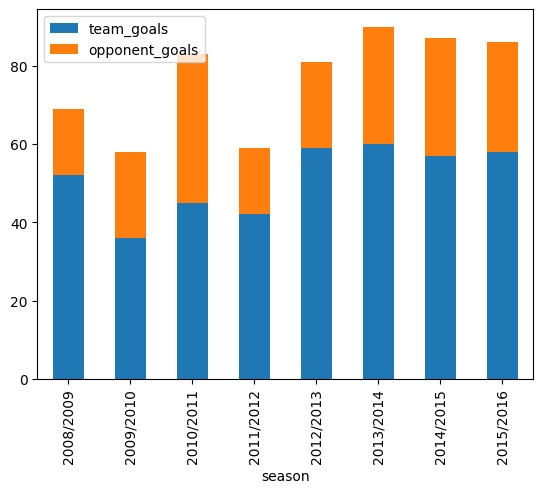

In [22]:
goals_per_season.plot(kind="bar", stacked=True)

* policz średnią liczbę bramek na jeden mecz w każdej lidze. Narysuj wykres


In [24]:
data["goals_sum"] = data.home_team_goal + data.away_team_goal
data

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,goals_diff,goals_sum
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1,0,2
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3,3,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0,5,5
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3,2,4
...,...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,FC St. Gallen,FC Thun,2015-09-22,2015/2016,1,0,1,1
25975,Switzerland,Switzerland Super League,FC Vaduz,FC Luzern,2015-09-23,2015/2016,1,2,1,3
25976,Switzerland,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2015-09-23,2015/2016,2,0,2,2
25977,Switzerland,Switzerland Super League,Lugano,FC Zürich,2015-09-22,2015/2016,0,0,0,0


In [25]:
goals_per_country = data.groupby('country').agg({'goals_sum': sum})
goals_per_country

,goals_sum
country,
Belgium,4841
England,8240
France,7427
Germany,7103
Italy,7895
Netherlands,7542
Poland,4656
Portugal,5201
Scotland,4804


In [26]:
matches_per_country = data["country"].value_counts()
matches_per_country

England        3040
France         3040
Spain          3040
Italy          3017
Germany        2448
Netherlands    2448
Portugal       2052
Poland         1920
Scotland       1824
Belgium        1728
Switzerland    1422
Name: country, dtype: int64

In [27]:
goals_per_match = goals_per_country.goals_sum / matches_per_country



<AxesSubplot: title={'center': 'Goals per match (top leagues in Europe)'}>

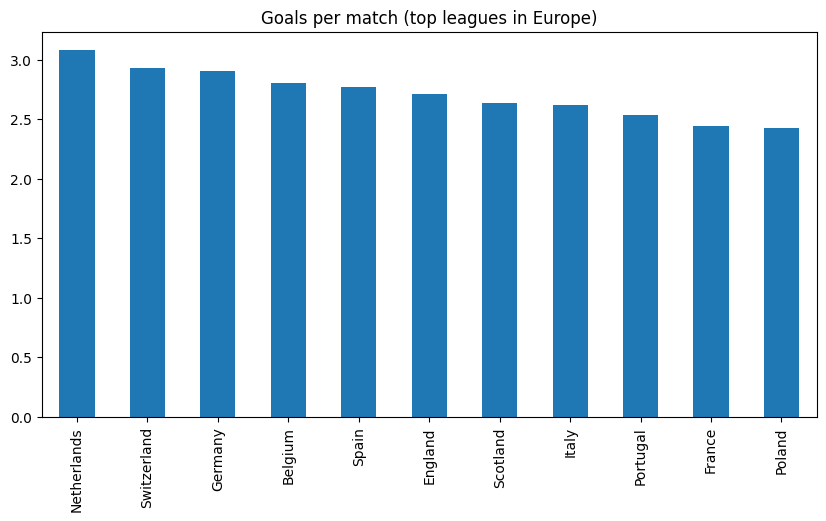

In [28]:
goals_per_match.sort_values(ascending=False).plot(
    kind="bar",
    title="Goals per match (top leagues in Europe)",
    figsize=(10, 5)
)